In [1]:
import numpy as np
import pandas as pd
from astropy import table
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt 
from astropy import units as u
from astroquery.xmatch import XMatch
from astropy.table import Table, unique,vstack

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
Vizier.ROW_LIMIT=-1
mcquillan_koi = Vizier.get_catalogs("J/ApJ/775/L11")[0]


In [3]:
#planets = pd.read_csv('confirmed_pls.csv', engine = 'python')

In [4]:
#fake_posi = pd.read_csv('fakeposi.csv', engine = 'python')

In [5]:
planets = pd.read_csv(r"C:\Users\ylana\Downloads\confirmed_planets.csv", engine = 'python')

In [6]:
len(planets)



#planets = Table.from_pandas(planets)

933

In [7]:
df_no_duplicates = planets.drop_duplicates(subset=['tic_id'])



In [8]:
# xmacth = XMatch.query(cat1=open('fakeposi.csv'),
#                       cat2='J/ApJ/775/L11',
#                       max_distance= 2 * u.arcsec,
#                       colRA1='ra', colDec1='dec')

In [9]:
df_no_duplicates['Rp']

0      13.40
1       4.08
3       1.65
4      11.70
5       3.19
       ...  
928     5.50
929     1.49
930     2.90
931     1.07
932     2.50
Name: Rp, Length: 618, dtype: float64

In [11]:
sample_primordial = df_no_duplicates


prot1x = df_no_duplicates[df_no_duplicates['Prot'] >= 0.8*df_no_duplicates['Porb']]
prot1x = prot1x[prot1x['Prot'] <= 1.2*prot1x['Porb']]

prot2x = df_no_duplicates[df_no_duplicates['Prot'] >= 1.8*df_no_duplicates['Porb']]
prot2x = prot2x[prot2x['Prot'] <= 2.2*prot2x['Porb']]

In [12]:
plot4 = sample_primordial[sample_primordial['pl_bmassj'] != 0 ]
plot4 = plot4[plot4['Rp'] != 0 ]

plot4 = plot4.dropna(subset=['pl_bmassj', 'Rp']) #, 'pl_bmassjerr1', 'pl_bmassjerr2']) #, 'pl_radjerr1', 'pl_radjerr2'])

# plot4 = plot4[plot4['pl_bmassjerr1'] < 1]
# plot4 = plot4[plot4['pl_bmassjerr2'] < 1]

# plot4 = plot4[plot4['pl_radjerr1'] < 1]
# plot4 = plot4[plot4['pl_radjerr1'] < 1]



# xerrmax = plot4['pl_bmassjerr1']
# xerrmin = plot4['pl_bmassjerr2']

# xerror = [xerrmax, abs(xerrmin)]

# yerrmax = plot4['pl_radjerr1']
# yerrmin = plot4['pl_radjerr2']

# yerror = [yerrmax, abs(yerrmin)]

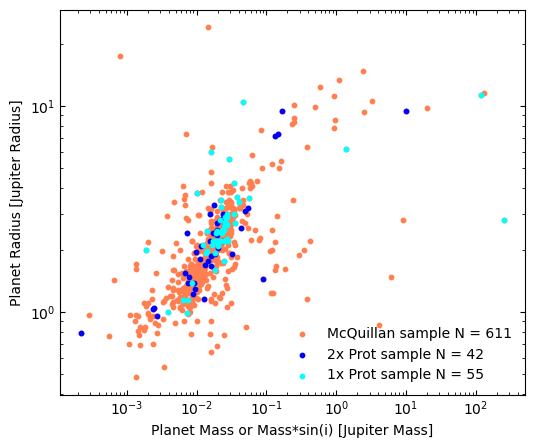

In [17]:
plt.figure(figsize=(6,5))
plt.scatter(plot4['pl_bmassj'], plot4['Rp'], s = 10, c = 'coral', label = f'McQuillan sample N = {len(plot4)}')
plt.scatter(prot2x['pl_bmassj'], prot2x['Rp'], s = 10, c = 'blue',label = f'2x Prot sample N = {len(prot2x)}')
plt.scatter(prot1x['pl_bmassj'], prot1x['Rp'], s = 10, c = 'aqua',label = f'1x Prot sample N = {len(prot1x)}')

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.yscale('log')

#plt.vlines(0.4, 0, 50, color = 'gray', linestyle = '--', linewidth=1.7)
#plt.vlines(0.0692, 0, 50, color = 'gray', linestyle = '--', linewidth=1.7)

# plt.errorbar(plot4['pl_bmassj'], plot4['pl_radj'], xerr= xerror, yerr= yerror, fmt= 'o', ecolor='gray', elinewidth=0.5, alpha = .4, mfc = 'coral', mew = 0, ms = 3, )
plt.ylabel('Planet Radius [Jupiter Radius]')
plt.xlabel('Planet Mass or Mass*sin(i) [Jupiter Mass]')

plt.legend(frameon=False)

#plt.savefig('raio_mass.png', dpi=500)


In [24]:
plot1 = sample_primordial[sample_primordial['pl_orbsmax'] != 0] #com medida de semi orbit
plot1 = plot1[plot1['pl_bmassj'] != 0]


plot1 = plot1[plot1['pl_bmassj'] < 13]
radv = plot1[plot1['discoverymethod'] == 'Radial Velocity']
trasnit = plot1[plot1['discoverymethod'] == 'Transit']
micro = plot1[plot1['discoverymethod'] == 'Microlensing']
imagins = plot1[plot1['discoverymethod'] == 'Imaging']



C:\Users\ylana\AppData\Local\Temp\ipykernel_23536\2690896691.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,10000)


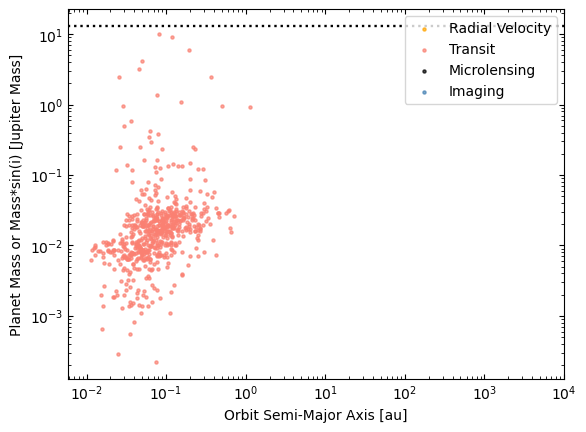

In [138]:

#plt.scatter(plot1['pl_orbsmax'], plot1['pl_bmassj'], s = 5, marker = 'o')
plt.scatter(radv['pl_orbsmax'], radv['pl_bmassj'], s = 5, marker = 'o', c = 'orange', alpha = 0.7, ec = 'orange', label = 'Radial Velocity')
plt.scatter(trasnit['pl_orbsmax'], trasnit['pl_bmassj'], s = 5, marker = 'o', c = 'salmon', alpha = 0.7, ec = 'salmon', label = 'Transit')
plt.scatter(micro['pl_orbsmax'], micro['pl_bmassj'], s = 5, marker = 'o', c = 'black', alpha = 0.7, ec = 'black', label = 'Microlensing')
plt.scatter(imagins['pl_orbsmax'], imagins['pl_bmassj'], s = 5, marker = 'o', c = 'steelblue', alpha = 0.7, ec = 'steelblue', label = 'Imaging')


plt.hlines(13,0,10000, color = 'black', linestyle = ':', linewidth=1.7)
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Orbit Semi-Major Axis [au]')
plt.ylabel('Planet Mass or Mass*sin(i) [Jupiter Mass]')
plt.xlim(0,10000)
plt.legend()
plt.show()

In [19]:
def freedman_diaconis_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    return int((np.max(data) - np.min(data)) / bin_width)

In [20]:
plot2 = sample_primordial[sample_primordial['pl_bmasse'] != 0]
plot2 = plot2[plot2['pl_bmasse'] < 20]
teste = plot2['pl_bmasse'].dropna()
sample_2 = prot2x.dropna(subset=["pl_bmasse"])
sample_1 = prot1x.dropna(subset=["pl_bmasse"])



num_bins = freedman_diaconis_bins(teste)
num_bins2 = freedman_diaconis_bins(sample_2['pl_bmasse'])
num_bins1 = freedman_diaconis_bins(sample_1['pl_bmasse'])



In [29]:
max(sample_2['pl_bmasse'])

3209.9

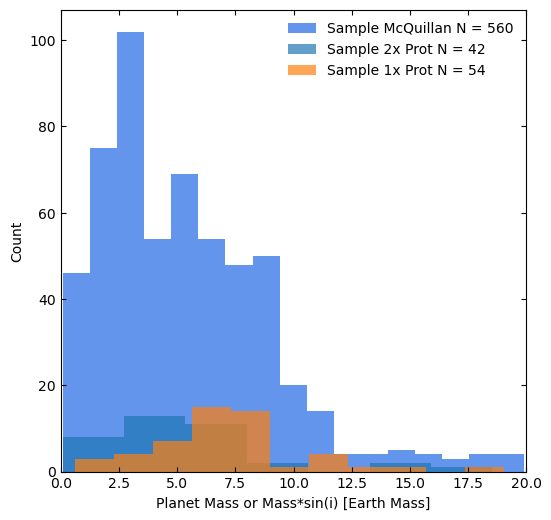

In [23]:
plt.figure(figsize=(6,6))

plt.hist(teste, bins = num_bins, color ="cornflowerblue", label = f"Sample McQuillan N = { len(plot2) }")
plt.hist(sample_2['pl_bmasse'], bins = num_bins2, alpha = 0.7, label = f"Sample 2x Prot N = { len(sample_2) }")
plt.hist(sample_1['pl_bmasse'], bins = num_bins1,alpha = 0.7, label = f"Sample 1x Prot N = { len(sample_1) }")



plt.xlim(0,20)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.ylabel('Count')
plt.xlabel('Planet Mass or Mass*sin(i) [Earth Mass]')
plt.legend(frameon = False)
plt.show()

In [58]:
plot3 = sample_primordial[sample_primordial['Rp'] != 0]
plot3 = plot3['Rp'].dropna()


sample_2 = prot2x.dropna(subset=["Rp"])
sample_1 = prot1x.dropna(subset=["Rp"])




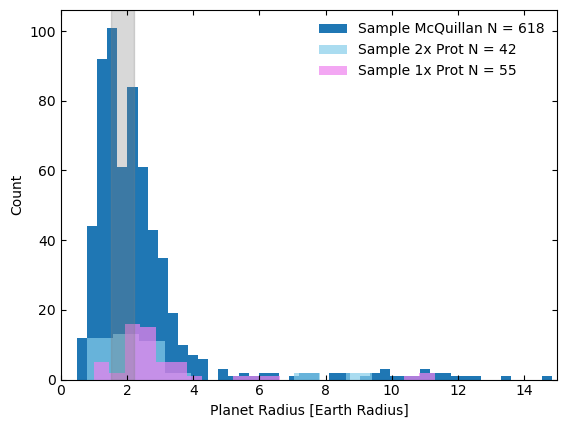

In [60]:
num_bins = freedman_diaconis_bins(plot3)
num_bins2 = freedman_diaconis_bins(sample_2['Rp'])
num_bins1 = freedman_diaconis_bins(sample_1['Rp'])



plt.hist(plot3, bins = num_bins, label = f"Sample McQuillan N = { len(plot3) }")
plt.hist(sample_2['Rp'], bins = num_bins2, alpha = 0.7, color = 'skyblue', label = f"Sample 2x Prot N = { len(sample_2) }")
plt.hist(sample_1['Rp'], bins = num_bins1, alpha = 0.7, color = 'violet', label = f"Sample 1x Prot N = { len(sample_1) }")


plt.axvspan(1.5, 2.2, alpha=0.3, color='gray')

plt.xlim(0,15)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.ylabel('Count')
plt.xlabel('Planet Radius [Earth Radius]')
#plt.savefig('hiat_raio_todos.png', dpi=500)

plt.legend(frameon = False)

plt.show()

In [144]:
sample_primordial


,angDist,pl_name,hostname,pl_letter,hd_name,tic_id,sy_snum,sy_pnum,discoverymethod,disc_year,...,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,ra.1,dec.1,B-V,Age_gyro_myr,radius_category,point_size
0,0.109425,KOI-12 b,KOI-12,b,NaN,TIC 169461816,1,2,Transit,2015,...,-3.676000e-06,146.596466,0.000163,-0.000163,297.45374,41.010990,0.493394,39.087433,10 R_â,200
1,0.064795,KOI-142 b,KOI-142,b,NaN,TIC 122712595,1,3,Transit,2013,...,-4.875000e-06,133.009227,0.000349,-0.000349,291.14807,40.669399,0.773780,3772.992011,5 R_â,40
3,0.100329,KOI-1833 d,Kepler-968,d,NaN,TIC 350814607,1,3,Transit,2021,...,-7.316000e-06,132.736240,0.001600,-0.001600,285.60254,50.112041,1.204457,199.482819,2 R_â,10
4,0.185394,KOI-217 b,KOI-217,b,NaN,TIC 271354351,1,1,Transit,2010,...,-3.520000e-07,133.415043,0.000074,-0.000074,294.86551,46.285851,0.729117,1873.142063,10 R_â,200
5,0.839549,KOI-984 b,KOI-984,b,NaN,TIC 122784501,1,2,Transit,2022,...,-1.524000e-05,262.062450,0.002110,-0.002110,291.04880,36.839882,0.634410,482.871500,5 R_â,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.039962,Kepler-993 b,Kepler-993,b,NaN,TIC 63365721,1,1,Transit,2016,...,-4.197000e-05,135.234320,0.001700,-0.001700,292.61411,44.394661,1.610160,502.512817,10 R_â,200
929,0.671122,Kepler-994 b,Kepler-994,b,NaN,TIC 158983792,1,1,Transit,2016,...,-6.050000e-07,133.231766,0.000430,-0.000430,289.07224,47.407070,1.459794,459.784895,2 R_â,10
930,0.153888,Kepler-995 b,Kepler-995,b,NaN,TIC 120315006,1,1,Transit,2016,...,-9.640000e-05,140.925610,0.002580,-0.002580,284.61572,39.131039,0.864693,1098.160117,5 R_â,40
931,0.132109,Kepler-997 b,Kepler-997,b,NaN,TIC 299159378,1,1,Transit,2016,...,-8.960000e-06,132.430680,0.002550,-0.002550,289.23337,49.938931,0.576033,1357.814357,2 R_â,10


In [178]:
idade = sample_primordial
idade_balli = idade[idade['Age_gyro_myr'] != 0]
idade_balli = idade_balli[idade_balli['Teff'] < 5600]

idade = idade[idade['st_age'] != 0]
idade = idade.dropna(subset=["st_age"])
idade = idade[idade['Teff'] < 5600]



1      1.60
3      2.14
4      1.70
11     4.68
14     4.17
       ... 
924    1.47
927    3.02
928    3.89
929    3.24
930    5.01
Name: st_age, Length: 431, dtype: float64

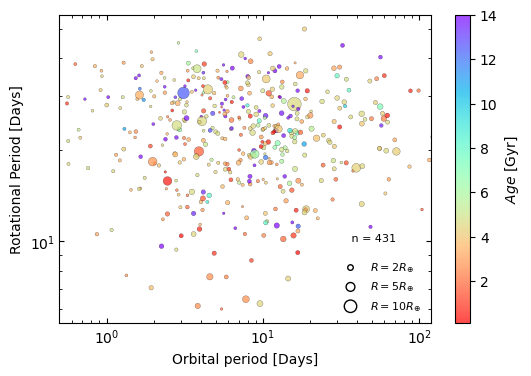

In [180]:
plt.figure(figsize=(6,4))

plt.scatter([],[], s = 8*2, c = 'none', ec = 'black', label = r"$R = 2 R_{\oplus}$")
plt.scatter([],[], s = 8*5, c = 'none', ec = 'black', label = r"$R = 5 R_{\oplus}$")
plt.scatter([],[], s = 8*10, c = 'none', ec = 'black', label = r"$R = 10 R_{\oplus}$")

#plt.scatter(sample['pl_orbper'], sample['Prot'], s = sample['pl_rade']*2 ,cmap = 'rainbow_r', c = sample['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
#plt.scatter(idade['pl_orbper'], idade['Prot'], s = idade['Rp'] * 4,c = idade['Age_gyro_myr']/1000, cmap = 'rainbow_r',alpha = 0.7, ec = 'black', lw = 0.2, ).set_clim(0,14)

plt.scatter(idade['pl_orbper'], idade['Prot'], s = idade['Rp'] * 4, c = idade['st_age'], cmap = 'rainbow_r', alpha = 0.7, ec = 'black', lw = 0.2, ) #data2['Teff'])


plt.xlim(1,50)
plt.xlim(0.5,120)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.annotate(f" n = { len(idade) }",[35, 10],fontsize=8)



plt.legend(frameon = False, fontsize = 8)
plt.colorbar(label = r'$Age$ [Gyr]')

In [176]:
idade

,angDist,pl_name,hostname,pl_letter,hd_name,tic_id,sy_snum,sy_pnum,discoverymethod,disc_year,...,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,ra.1,dec.1,B-V,Age_gyro_myr,radius_category,point_size
0,0.109425,KOI-12 b,KOI-12,b,NaN,TIC 169461816,1,2,Transit,2015,...,-3.676000e-06,146.596466,0.000163,-0.000163,297.45374,41.010990,0.493394,39.087433,10 R_â,200
1,0.064795,KOI-142 b,KOI-142,b,NaN,TIC 122712595,1,3,Transit,2013,...,-4.875000e-06,133.009227,0.000349,-0.000349,291.14807,40.669399,0.773780,3772.992011,5 R_â,40
3,0.100329,KOI-1833 d,Kepler-968,d,NaN,TIC 350814607,1,3,Transit,2021,...,-7.316000e-06,132.736240,0.001600,-0.001600,285.60254,50.112041,1.204457,199.482819,2 R_â,10
4,0.185394,KOI-217 b,KOI-217,b,NaN,TIC 271354351,1,1,Transit,2010,...,-3.520000e-07,133.415043,0.000074,-0.000074,294.86551,46.285851,0.729117,1873.142063,10 R_â,200
5,0.839549,KOI-984 b,KOI-984,b,NaN,TIC 122784501,1,2,Transit,2022,...,-1.524000e-05,262.062450,0.002110,-0.002110,291.04880,36.839882,0.634410,482.871500,5 R_â,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.039962,Kepler-993 b,Kepler-993,b,NaN,TIC 63365721,1,1,Transit,2016,...,-4.197000e-05,135.234320,0.001700,-0.001700,292.61411,44.394661,1.610160,502.512817,10 R_â,200
929,0.671122,Kepler-994 b,Kepler-994,b,NaN,TIC 158983792,1,1,Transit,2016,...,-6.050000e-07,133.231766,0.000430,-0.000430,289.07224,47.407070,1.459794,459.784895,2 R_â,10
930,0.153888,Kepler-995 b,Kepler-995,b,NaN,TIC 120315006,1,1,Transit,2016,...,-9.640000e-05,140.925610,0.002580,-0.002580,284.61572,39.131039,0.864693,1098.160117,5 R_â,40
931,0.132109,Kepler-997 b,Kepler-997,b,NaN,TIC 299159378,1,1,Transit,2016,...,-8.960000e-06,132.430680,0.002550,-0.002550,289.23337,49.938931,0.576033,1357.814357,2 R_â,10


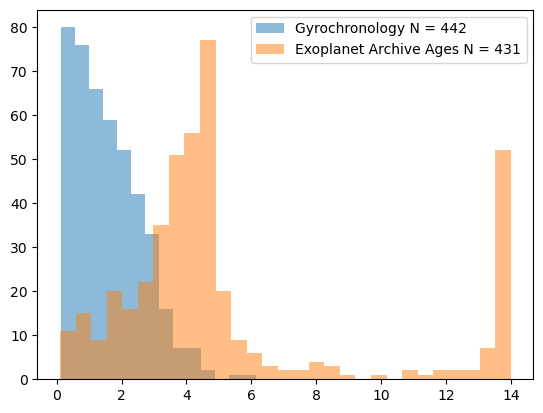

In [179]:
bin_gyro = freedman_diaconis_bins(idade_balli['Age_gyro_myr'])
bin_exo = freedman_diaconis_bins(idade['st_age'])


plt.hist(idade_balli['Age_gyro_myr']/1000, bins = bin_gyro, alpha = 0.5, label =f'Gyrochronology N = { len(idade_balli) }')
plt.hist(idade['st_age'], alpha = 0.5, bins = bin_exo, label = f'Exoplanet Archive Ages N = { len(idade)}')

plt.legend()

In [40]:
teff = sample_primordial
teff = teff[teff['Teff'] != 0]
teff = teff.dropna(subset=["Teff"])


In [41]:
sample_2 = prot2x['Teff']
sample_1 = prot1x['Teff']

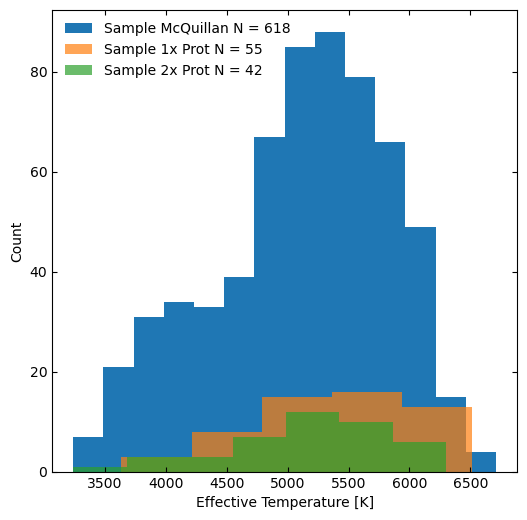

In [43]:
num_bins = freedman_diaconis_bins(teff['Teff'])
num_bins2 = freedman_diaconis_bins(sample_2)
num_bins1 = freedman_diaconis_bins(sample_1)


## all planets
plt.figure(figsize=(6,6))

plt.hist(teff['Teff'], bins = num_bins, label = f"Sample McQuillan N = { len(teff) }")
plt.hist(sample_1, bins = num_bins1,alpha = 0.7, label = f"Sample 1x Prot N = { len(sample_1) }")

plt.hist(sample_2, bins = num_bins2, alpha = 0.7, label = f"Sample 2x Prot N = { len(sample_2) }")




plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.ylabel('Count')
plt.xlabel('Effective Temperature [K]')
#plt.savefig('hiat_raio_todos.png', dpi=500)
plt.legend(frameon = False)

plt.show()

In [49]:
all_pls = pd.read_csv(r"C:\Users\ylana\Downloads\all_planets.csv")

In [50]:
mini = all_pls[all_pls['pl_rade'] < 2.2]
mini = mini[mini['pl_rade'] > 1.8]

len(mini)

536

In [68]:
mini = all_pls


mini = mini[mini['pl_orbper'] != 0]
mini = mini[mini['st_rotp'] != 0]

mini = mini.dropna(subset = ['pl_orbper', 'st_rotp'])
len(mini)

696

In [63]:
prot2x_mini = mini[mini['st_rotp'] >= 1.8*mini['pl_orbper']]
prot2x_mini = prot2x_mini[prot2x_mini['st_rotp'] <= 2.2*prot2x_mini['pl_orbper']]

In [ ]:
prot2x_mini = mini[mini['st_rotp'] >= 1.8*mini['pl_orbper']]
prot2x_mini = prot2x_mini[prot2x_mini['st_rotp'] <= 2.2*prot2x_mini['pl_orbper']]

C:\Users\ylana\AppData\Local\Temp\ipykernel_16508\3829072364.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1000)
C:\Users\ylana\AppData\Local\Temp\ipykernel_16508\3829072364.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.22476591661613335, 1000)

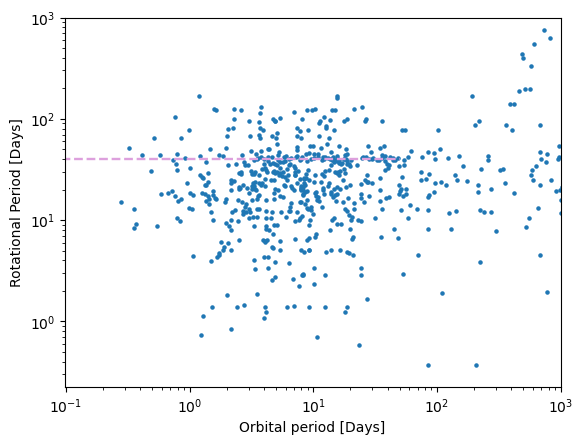

In [75]:
plt.scatter(mini['pl_orbper'],mini['st_rotp'], s = 5)

plt.hlines(40, 0, 50, color = 'plum', linestyle = '--', linewidth=1.7)


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.xlim(0,1000)
plt.ylim(0,1000)